In [1]:
#%reload_ext nb_black

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

There's some `order` data in this directory.  Find it, and read it into a dataframe.

In [3]:
df = pd.read_csv('data/orders.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.columns

Index(['product_id', 'state', 'date', 'rating', 'units_sold', 'price'], dtype='object')

In [6]:
df.head()

,product_id,state,date,rating,units_sold,price
0,5,ID,2010-02-05,*,6.0,$4.73
1,4,FL,2010-02-07,****,7.0,NaN
2,1,NY,2010-02-07,*,NaN,$23.81
3,7,HI,2010-03-12,*,4.0,$21.78
4,5,NY,2010-04-07,****,6.0,$4.73


Inspect the data frame with the `.info()` method.  Where do we have nans?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
product_id    213 non-null int64
state         213 non-null object
date          213 non-null object
rating        187 non-null object
units_sold    187 non-null float64
price         185 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 10.1+ KB


Further inspect the data frame with `.isna()` or `.isnull()`

What percentage of each column is `NaN`?

In [8]:
df.isna().sum()

product_id     0
state          0
date           0
rating        26
units_sold    26
price         28
dtype: int64

In [9]:
df.isna().mean()

product_id    0.000000
state         0.000000
date          0.000000
rating        0.122066
units_sold    0.122066
price         0.131455
dtype: float64

Convert the price column to numeric

In [10]:
df['price'] = df['price'].str.strip('$')
df['price'] = pd.to_numeric(df['price'])

Using `pd.to_numeric` with the option `errors="coerce"` can create new `NaN`s. 

Redo the same missing value analysis.

In [11]:
df['price'] = pd.to_numeric(df['price'])

Convert the ratings column to numeric.

In [12]:
mapping ={'*':1, '**':2, '***':3, '****':4, '*****':5}
#df['rating'].replace(mapping)

In [13]:
df['rating'].str.len()

0      1.0
1      4.0
2      1.0
3      1.0
4      4.0
5      4.0
6      5.0
7      NaN
8      1.0
9      5.0
10     3.0
11     NaN
12     3.0
13     5.0
14     1.0
15     5.0
16     5.0
17     3.0
18     2.0
19     1.0
20     3.0
21     2.0
22     2.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     5.0
      ... 
183    1.0
184    3.0
185    3.0
186    2.0
187    NaN
188    4.0
189    4.0
190    3.0
191    2.0
192    4.0
193    3.0
194    5.0
195    4.0
196    3.0
197    3.0
198    1.0
199    5.0
200    1.0
201    NaN
202    1.0
203    1.0
204    4.0
205    3.0
206    NaN
207    1.0
208    5.0
209    1.0
210    2.0
211    1.0
212    4.0
Name: rating, Length: 213, dtype: float64

Convert the date column to a date datatype and sort by it

In [14]:
df['date'] = pd.to_datetime(df['date'])

Now let's address the missing values.

In practice, the 2 main ways we might handle NAs are:

* Drop them
* Fill them in with a value
  * Some people didn't mark their height on a survey, maybe we fill in with the average height reported
  * The thermeter broke so we're missing a temperature at time 4, maybe we fill it in with the average of time 3 and time 5 (linear interpolation)


Before dropping we'd like to know why the values are NA because we might be dropping valid data.  For example, you might have seen something like below on a survey:

> 10. Are you a veteran?:  &emsp;&emsp; Yes [&emsp;]&emsp;&emsp;No [&emsp;]
> 
> (only answer the following questions if you answered yes to question 10)

In this case, we should expect non-veterans to have missing values to the veteran only questions.  Other times, missing values aren't that deep and they're just missing.  For example, maybe a survey taker didn't know there was a page 2 so they left it all blank.

In practice it's very important to know how the data was collected and what a missing value indicates.

* Is there any pattern to any of the missingness?

In [15]:
rows_with_na = df.isna().any(axis=1)
# columns_with_na = df.isna().any

In [16]:
df.isna().any(axis=1)

0      False
1       True
2       True
3      False
4      False
5      False
6       True
7       True
8       True
9      False
10     False
11      True
12     False
13      True
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
183    False
184    False
185    False
186    False
187     True
188    False
189    False
190    False
191    False
192    False
193    False
194    False
195    False
196     True
197    False
198    False
199     True
200    False
201     True
202     True
203     True
204    False
205    False
206     True
207     True
208    False
209     True
210    False
211    False
212    False
Length: 213, dtype: bool

We want to move forward with a dataframe that doesn't have any missing values.

* What options do we have?
* Which ones make sense for each column?
    * How do we decide which ones make sense?
    
Once these questions are answered.  Let's apply them until we have no missing values.

In [17]:
rows_missing_price = df.loc[df['price'].isna(), :]
rows_missing_price['rating'].value_counts()

***      7
**       7
*****    4
*        4
****     3
Name: rating, dtype: int64

In [18]:
df.dropna(subset=['rating']).isna().sum()

product_id     0
state          0
date           0
rating         0
units_sold    21
price         25
dtype: int64

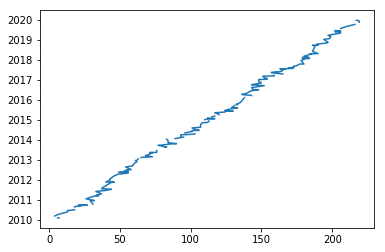

In [19]:
plt.plot(df['units_sold'],df['date'])
plt.show()

In [20]:
df = df.sort_values('date')
df.head()

,product_id,state,date,rating,units_sold,price
0,5,ID,2010-02-05,*,6.0,4.73
1,4,FL,2010-02-07,****,7.0,NaN
2,1,NY,2010-02-07,*,NaN,23.81
3,7,HI,2010-03-12,*,4.0,21.78
4,5,NY,2010-04-07,****,6.0,4.73


In [21]:
df['units_sold'].fillna(method='ffill')
df.head()

,product_id,state,date,rating,units_sold,price
0,5,ID,2010-02-05,*,6.0,4.73
1,4,FL,2010-02-07,****,7.0,NaN
2,1,NY,2010-02-07,*,NaN,23.81
3,7,HI,2010-03-12,*,4.0,21.78
4,5,NY,2010-04-07,****,6.0,4.73


In [22]:
df['units_sold'] = df['units_sold'].interpolate()

In [23]:
df.head()

,product_id,state,date,rating,units_sold,price
0,5,ID,2010-02-05,*,6.0,4.73
1,4,FL,2010-02-07,****,7.0,NaN
2,1,NY,2010-02-07,*,5.5,23.81
3,7,HI,2010-03-12,*,4.0,21.78
4,5,NY,2010-04-07,****,6.0,4.73
